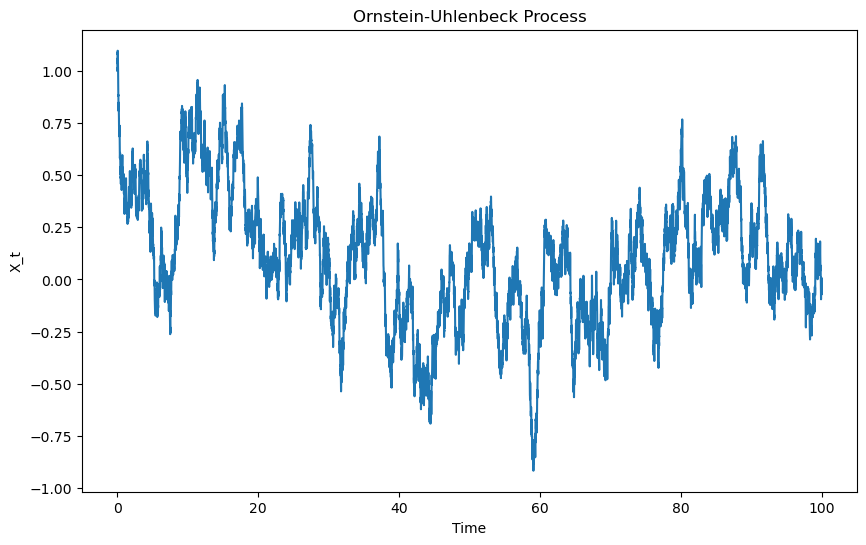

In [5]:
###Simulation of the Ornstein-Uhlenbeck process.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta = 0.5  # Speed of mean reversion
mu = 0.1      # Long-term mean
sigma = 0.3   # Volatility
dt = 0.01     # Time step
T = 100       # Total time
n = int(T/dt) # Number of time steps
x0 = 1.0      # Initial condition

# Initialize the process
X = np.zeros(n)
X[0] = x0
np.random.seed(42)  # for reproducibility

# Generate path
for t in range(1, n):
    dW = np.sqrt(dt) * np.random.randn()  # Brownian increment
    X[t] = X[t-1] + theta * (mu - X[t-1]) * dt + sigma * dW

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, n), X)
plt.title('Ornstein-Uhlenbeck Process')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.show()


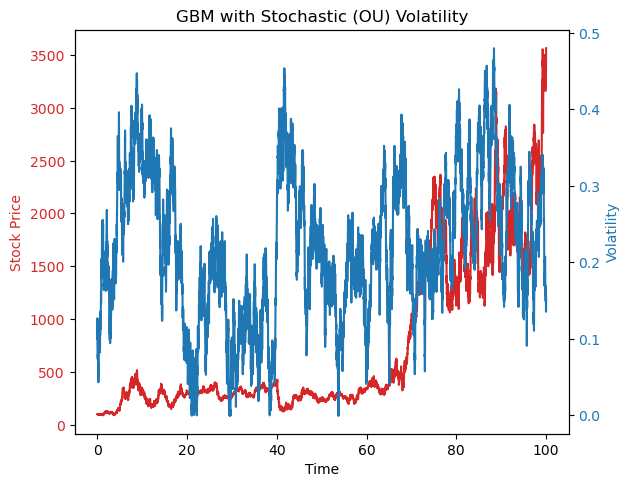

In [4]:
###Simulation of GBM with volatility described as OU process.
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
T = 100  # total time
dt = 0.01  # time step
n = int(T / dt)  # number of time steps

# GBM parameters
S0 = 100  # initial stock price
mu = 0.05  # drift

# OU parameters for volatility
sigma0 = 0.1  # initial volatility
theta = 0.5  # speed of mean reversion for volatility
long_term_mean = 0.2  # long-term mean of volatility
vol_of_vol = 0.1  # volatility of volatility

# Initialize arrays
S = np.zeros(n)
sigma = np.zeros(n)
S[0] = S0
sigma[0] = sigma0
np.random.seed(42)  # for reproducibility

# Simulate the paths
for t in range(1, n):
    dW1 = np.sqrt(dt) * np.random.randn()  # Brownian increment for stock
    dW2 = np.sqrt(dt) * np.random.randn()  # Brownian increment for volatility
    
    # Update volatility using OU process
    sigma[t] = sigma[t-1] + theta * (long_term_mean - sigma[t-1]) * dt + vol_of_vol * dW2
    sigma[t] = max(sigma[t], 0)  # Ensure positivity
    
    # Update stock price using GBM
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma[t]**2) * dt + sigma[t] * dW1)

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(np.linspace(0, T, n), S, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volatility', color=color)
ax2.plot(np.linspace(0, T, n), sigma, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('GBM with Stochastic (OU) Volatility')
plt.show()


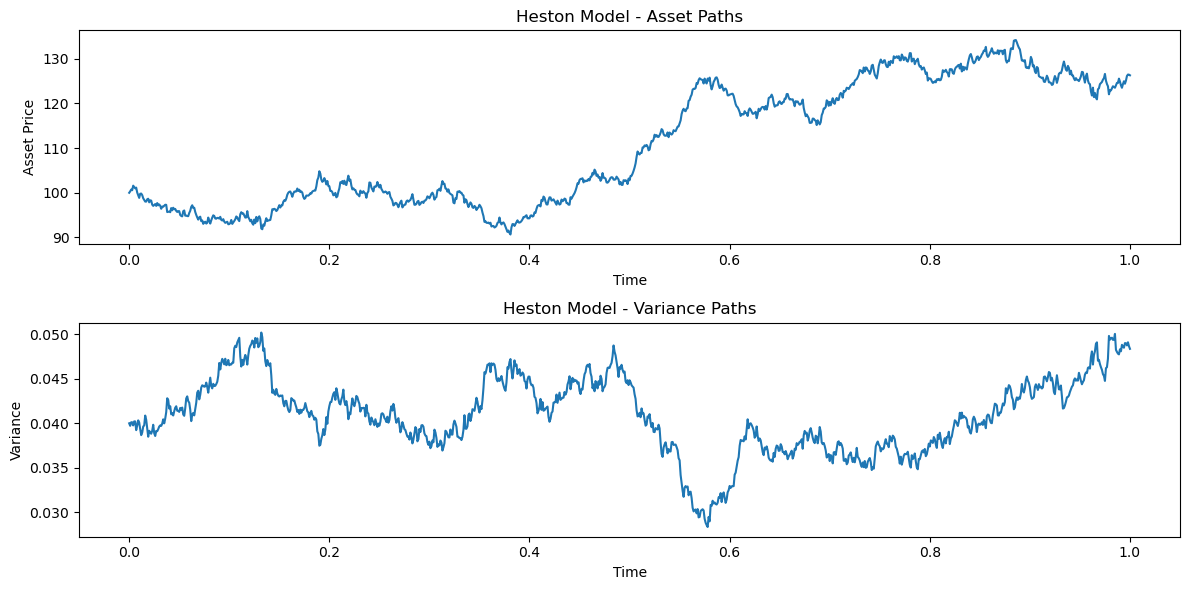

In [7]:
###Heston model, which is similar to GBM-OUvol,
###except that the variance is another form of mean-reverting stochastic process.
import numpy as np
import matplotlib.pyplot as plt

# Heston model parameters
kappa = 1.0  # rate of mean reversion
theta = 0.04  # long-term variance
xi = 0.1  # volatility of volatility
rho = -0.7  # correlation between asset and variance

# Other simulation parameters
S0 = 100  # initial asset price
v0 = 0.04  # initial variance
r = 0.03  # risk-free rate
T = 1.0  # time horizon
dt = 0.001  # time step
N = int(T / dt)  # number of time steps
M = 1  # number of paths

# Initialize asset and variance paths
S = np.zeros((M, N+1))
v = np.zeros((M, N+1))
S[:, 0] = S0
v[:, 0] = v0

# Simulate the paths
np.random.seed(42)
for t in range(1, N + 1):
    dW1 = np.sqrt(dt) * np.random.randn(M)
    dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.sqrt(dt) * np.random.randn(M)

    # Euler-Maruyama method
    S[:, t] = S[:, t-1] * np.exp((r - 0.5 * v[:, t-1]) * dt + np.sqrt(v[:, t-1]) * dW1)
    v[:, t] = v[:, t-1] + kappa * (theta - v[:, t-1]) * dt + xi * np.sqrt(v[:, t-1]) * dW2

    # Ensure variance is non-negative
    v[:, t] = np.maximum(v[:, t], 0)

# Plotting the simulated paths
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, T, N+1), S.T)
plt.title('Heston Model - Asset Paths')
plt.xlabel('Time')
plt.ylabel('Asset Price')

plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, T, N+1), v.T)
plt.title('Heston Model - Variance Paths')
plt.xlabel('Time')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()
